In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib

C:\Users\bono\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
directory2 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0058 - 20241024T182042 7m15s 0.022km Aalsmeer"
directory3 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory4 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0057 - 20241024T143305 48m25s 2.925km De Rijp - Uitgeest - De Rijp"
result1 = lib.DataUitzoekenGui(directory)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_05_05.csv', '3_MPPT_05_07.csv', '4_MPPT…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [150]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    merged_df2 = result2['merged_df'].copy()
    merged_df3 = result3['merged_df'].copy()
    merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [151]:
#filter de eerste 100 waarders erut
merged_df1 = merged_df1.iloc[0:-1]
#lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [152]:
#lib.plot_trajectory_map(merged_df4['1_Latitude'].dropna(), merged_df4['1_Longitude'].dropna(), merged_df4['1_Snelheid over de grond in km/h'].dropna())

In [153]:
#filter de eerste 100 waarders erut
merged_df3 = merged_df3.iloc[10000:-5000]
#lib.plot_trajectory_map(merged_df3['1_Latitude'].dropna(), merged_df3['1_Longitude'].dropna(), merged_df3['1_Snelheid over de grond in km/h'].dropna())

In [154]:
#lib.plot_trajectory_map(merged_df2['1_Latitude'].dropna(), merged_df2['1_Longitude'].dropna(), merged_df2['1_Snelheid over de grond in km/h'].dropna())

In [155]:
#reken het vermogen van de vesc uit door spanning keer stroom te doen
merged_df3['2_VESC input vermogen (W)'] = merged_df3['2_VESC input current (A)'] * merged_df3['2_VESC input voltage (V)']

In [165]:
#filter bij mergd3 alles boven de 20 km/u eruit
merged_df3 = merged_df3[merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]
#en alle vermogens boven de 1500 W eruit
merged_df3 = merged_df3[merged_df3['2_VESC input vermogen (W)'] < 1500]
merged_df3 = merged_df3[merged_df3['2_VESC input vermogen (W)'] > 10]
# #en filter eruit wanneer de accelelratie dus .diff groter is dan 0.1 en kliener dan -0.1
merged_df3 = merged_df3[merged_df3['1_Snelheid over de grond in km/h'].diff() < 0.01]
merged_df3 = merged_df3[merged_df3['1_Snelheid over de grond in km/h'].diff() > -0.01]

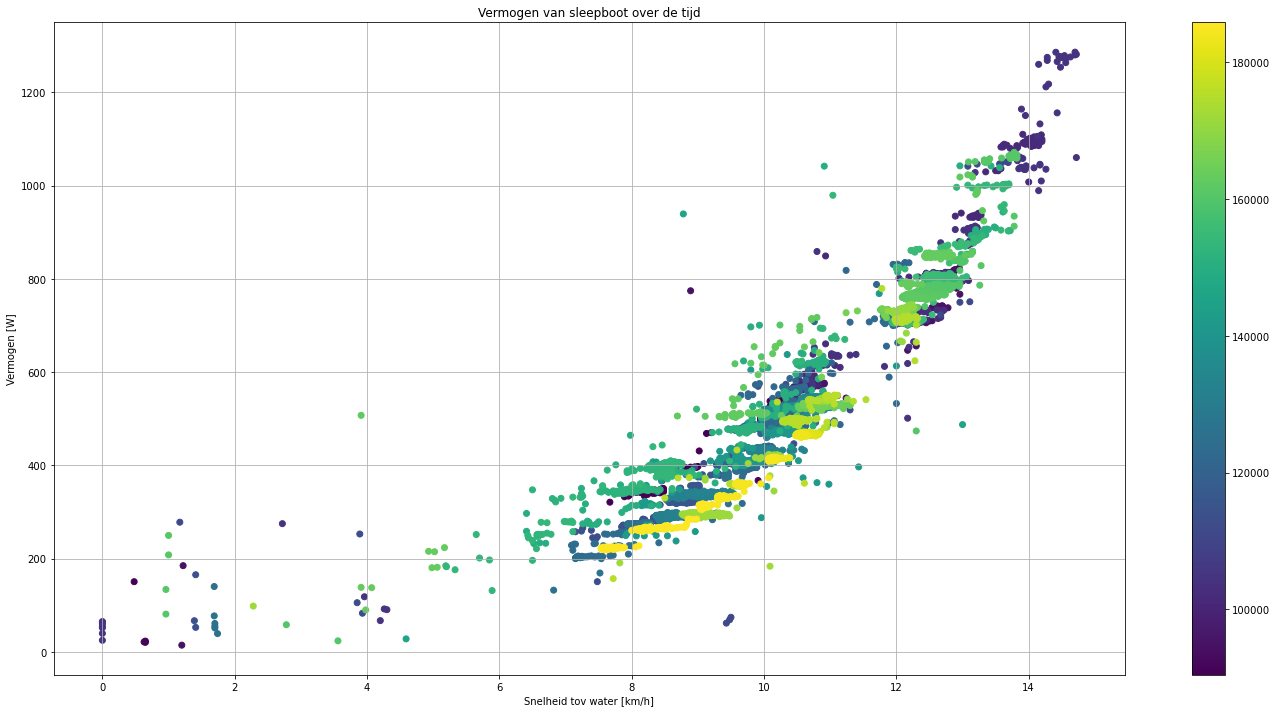

In [166]:
#plot van merged3 de vesc vermogen tov van de snelheid
plt.figure(figsize=(24, 12))
plt.scatter(merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df3['2_VESC input vermogen (W)'].to_numpy(),c=merged_df3['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vermogen van sleepboot over de tijd')
plt.grid(True)
plt.show()

In [123]:
# filterout when the acceleration is below 0.1 en hoger dan -0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

#wanneer snelheid onder de 0 is filteren
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'] > 0]

#filter alles voor 10:00 uur eruit 'Tijd [UUMMSS]' en na 10:40
merged_df1 = merged_df1[merged_df1['1_Tijd'] > 100000]

In [124]:
# filterout when the acceleration is below 0.1 en hoger dan -0.1
    #merged_df4 = merged_df4[merged_df4['1_Snelheid over de grond in km/h'].diff() < 0.1]
    #merged_df4 = merged_df4[merged_df4['1_Snelheid over de grond in km/h'].diff() > -0.1]

#wanneer snelheid onder de 0 is filteren
    #merged_df4 = merged_df4[merged_df4['1_Snelheid over de grond in km/h'] > 0]

In [125]:
merged_df1['2_Loadcell in N'] = (merged_df1['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5+115)
merged_df2['2_Loadcell in N'] = (merged_df2['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5+115)
merged_df4['2_Loadcell in N'] = (merged_df4['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5+115)
merged_df1['2_Loadcell in kg'] = merged_df1['2_Loadcell in N'] / 9.81
merged_df2['2_Loadcell in kg'] = merged_df2['2_Loadcell in N'] / 9.81
merged_df4['2_Loadcell in kg'] = merged_df4['2_Loadcell in N'] / 9.81

# Snelheid omzetten van km/h naar m/s
merged_df1["speed_water_ms"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6
merged_df4["speed_water_ms"] = merged_df4['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6
merged_df3["speed_water_ms"] = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6

merged_df1['speed_grond_ms'] = merged_df1['1_Snelheid over de grond in km/h'].to_numpy() / 3.6
merged_df4['speed_grond_ms'] = merged_df4['1_Snelheid over de grond in km/h'].to_numpy() / 3.6
merged_df3['speed_grond_ms'] = merged_df3['1_Snelheid over de grond in km/h'].to_numpy() / 3.6

# Vermogen berekenen
merged_df1['Vermogen aantrekking'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_ms"]
merged_df4['Vermogen aantrekking'] = merged_df4['2_Loadcell in N'].to_numpy() * merged_df4["speed_water_ms"]

In [126]:
#filter eruit wanneer de diff in loadceel N groter is dan 10
#merged_df1 = merged_df1[merged_df1['2_Loadcell in N'].diff() < 10]
#filter eruit als de loadcell onder de 50 zit de N
#merged_df1 = merged_df1[merged_df1['2_Loadcell in N'] > 0]


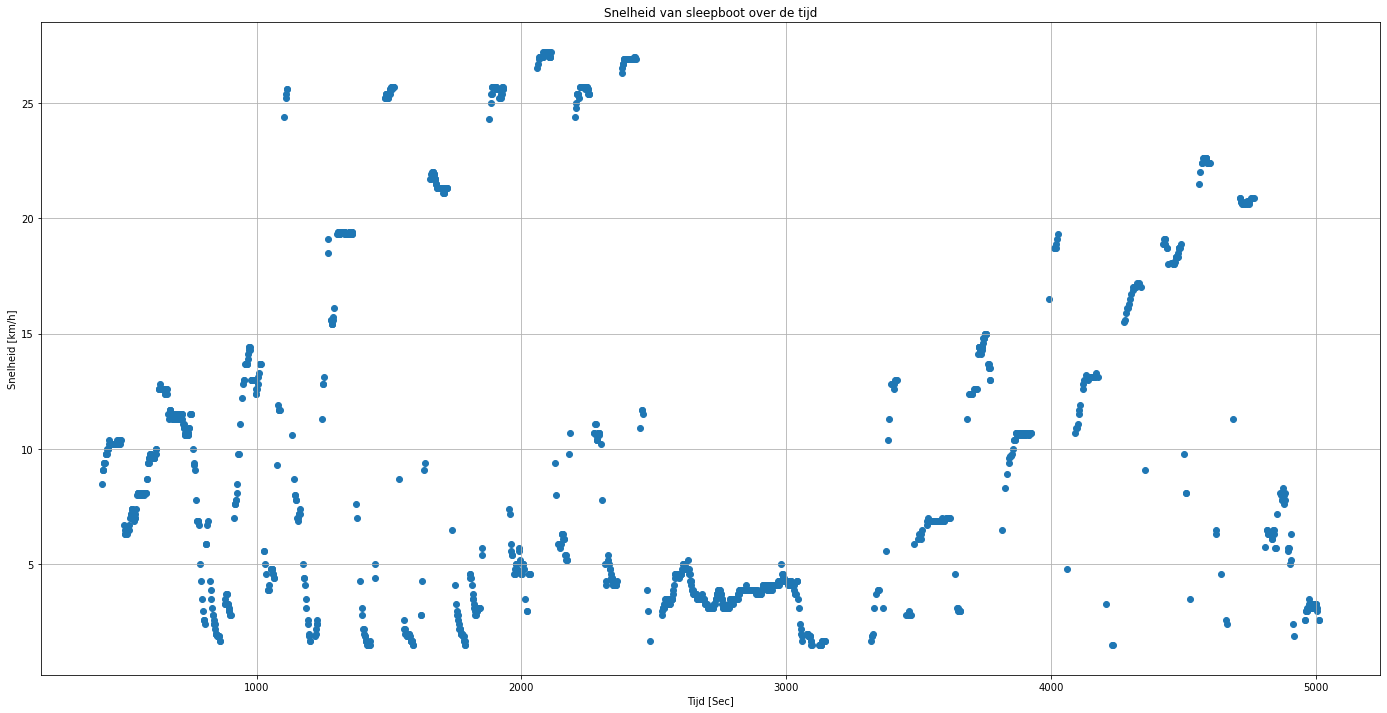

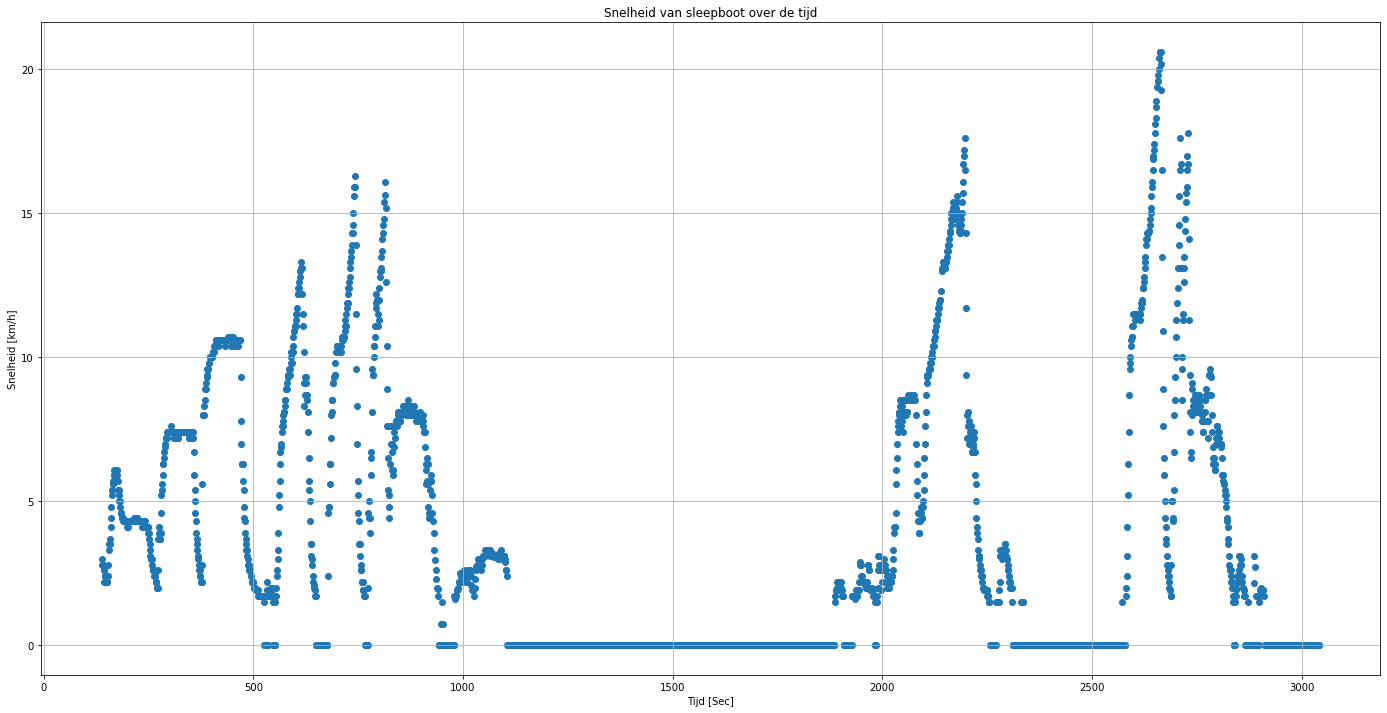

In [127]:
#plot van merged4 de snelheid tov van de grond over de tijd
plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Dataloggertijd, in s'].to_numpy(),merged_df1['1_Snelheid over de grond in km/h'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Snelheid [km/h]')
plt.title('Snelheid van sleepboot over de tijd')
plt.grid(True)
plt.show()

#plot van merged4 de snelheid tov van de grond over de tijd
plt.figure(figsize=(24, 12))
plt.scatter(merged_df4['1_Dataloggertijd, in s'].to_numpy(),merged_df4['1_Snelheid over de grond in km/h'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Snelheid [km/h]')
plt.title('Snelheid van sleepboot over de tijd')
plt.grid(True)
plt.show()

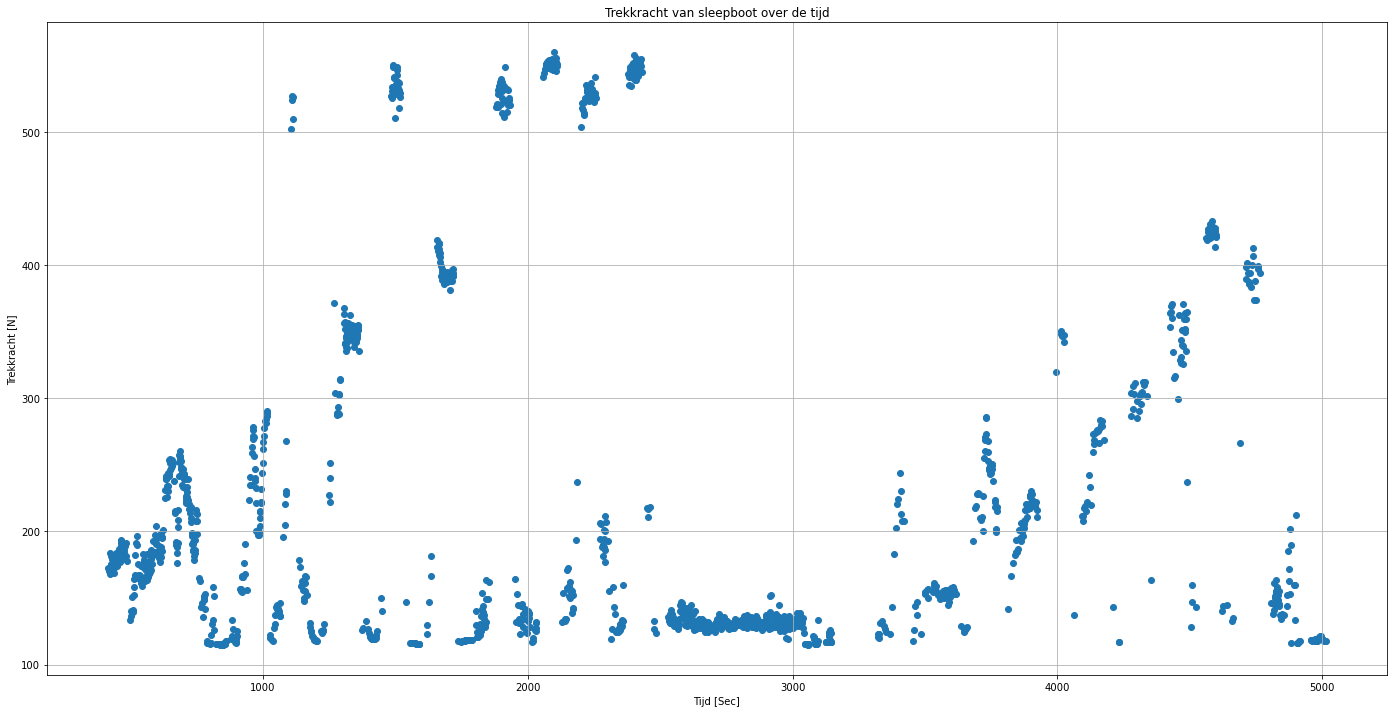

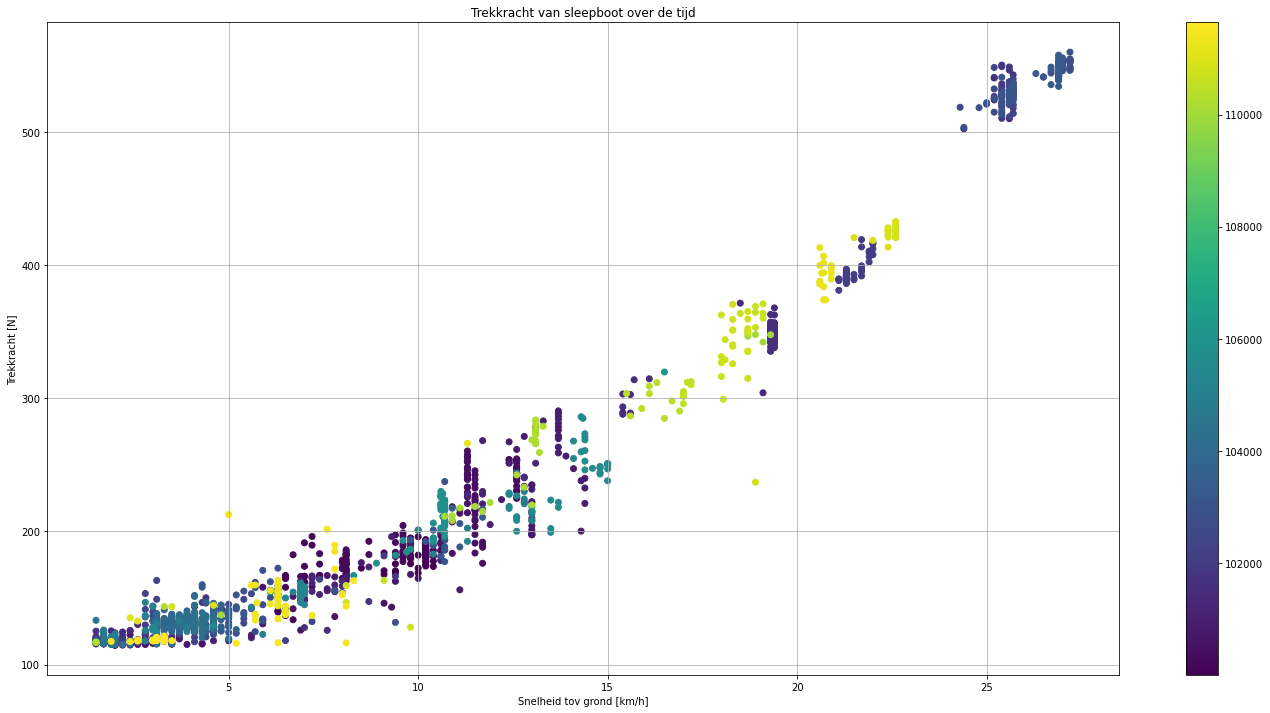

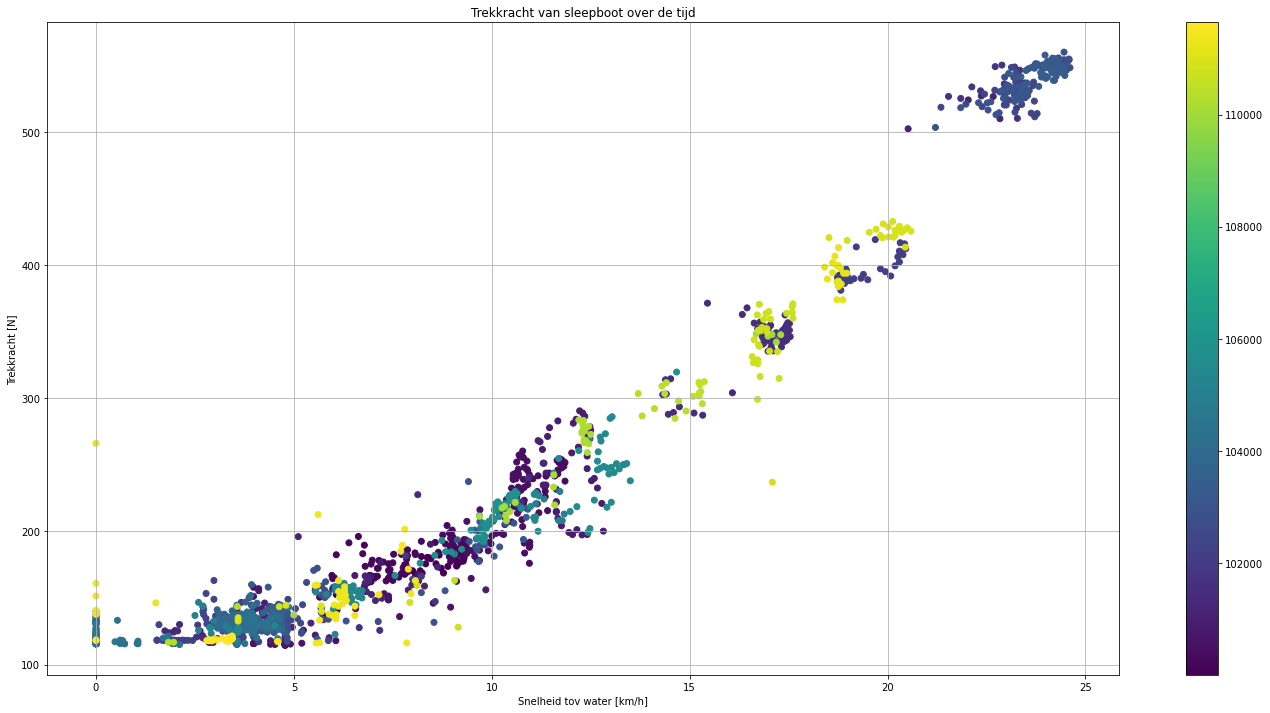

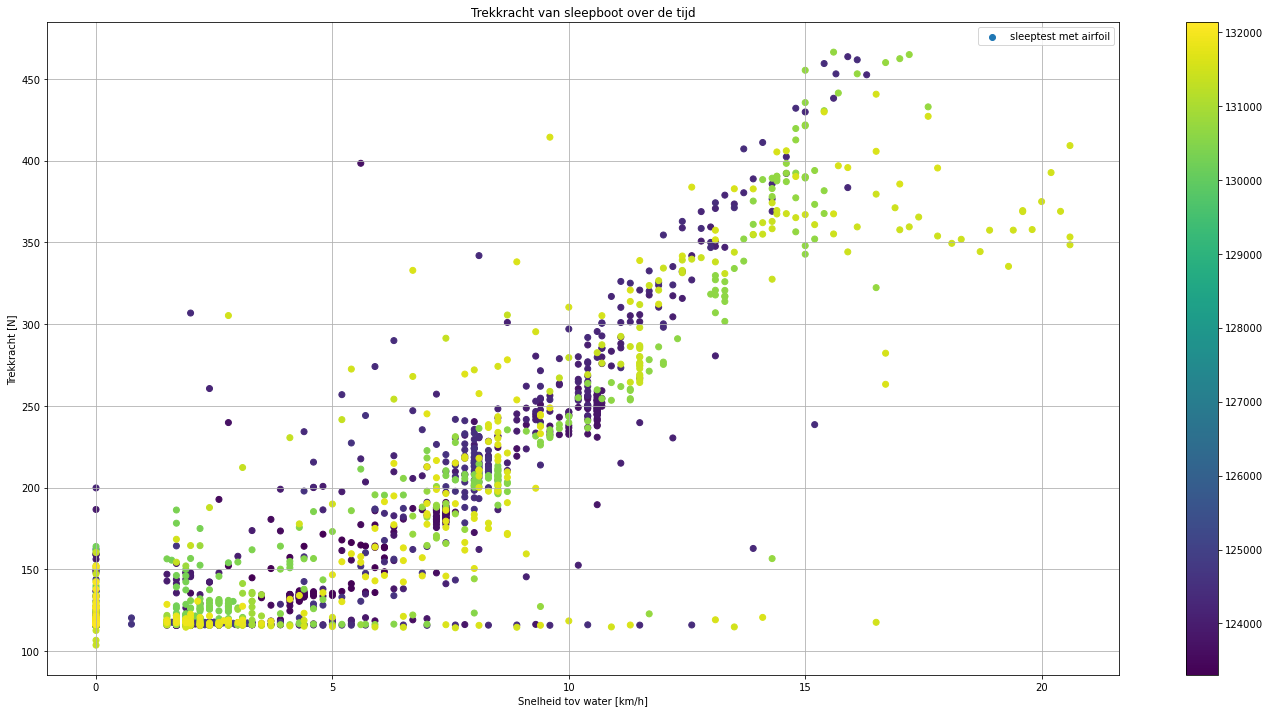

In [138]:
#plt.scatter(merged_df2['1_Tijd'].to_numpy(),merged_df2['2_Loadcell in kg'].to_numpy())
#plt.xlabel('Tijd [UU-MM-SS]')
#plt.ylabel('Gewicht [kg]')
#plt.title('Gewicht van de boot over de tijd')
#plt.grid(True)
#plt.show()
#
#
plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Dataloggertijd, in s'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Snelheid over de grond in km/h'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov grond [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12))
plt.scatter(merged_df4['1_Snelheid over de grond in km/h'].to_numpy(),merged_df4['2_Loadcell in N'].to_numpy(),label='sleeptest met airfoil',c=merged_df4['1_Tijd'].to_numpy())
#plt.scatter(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),color = 'red',label='sleeptest zonder airfoil')
plt.colorbar()
plt.legend()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

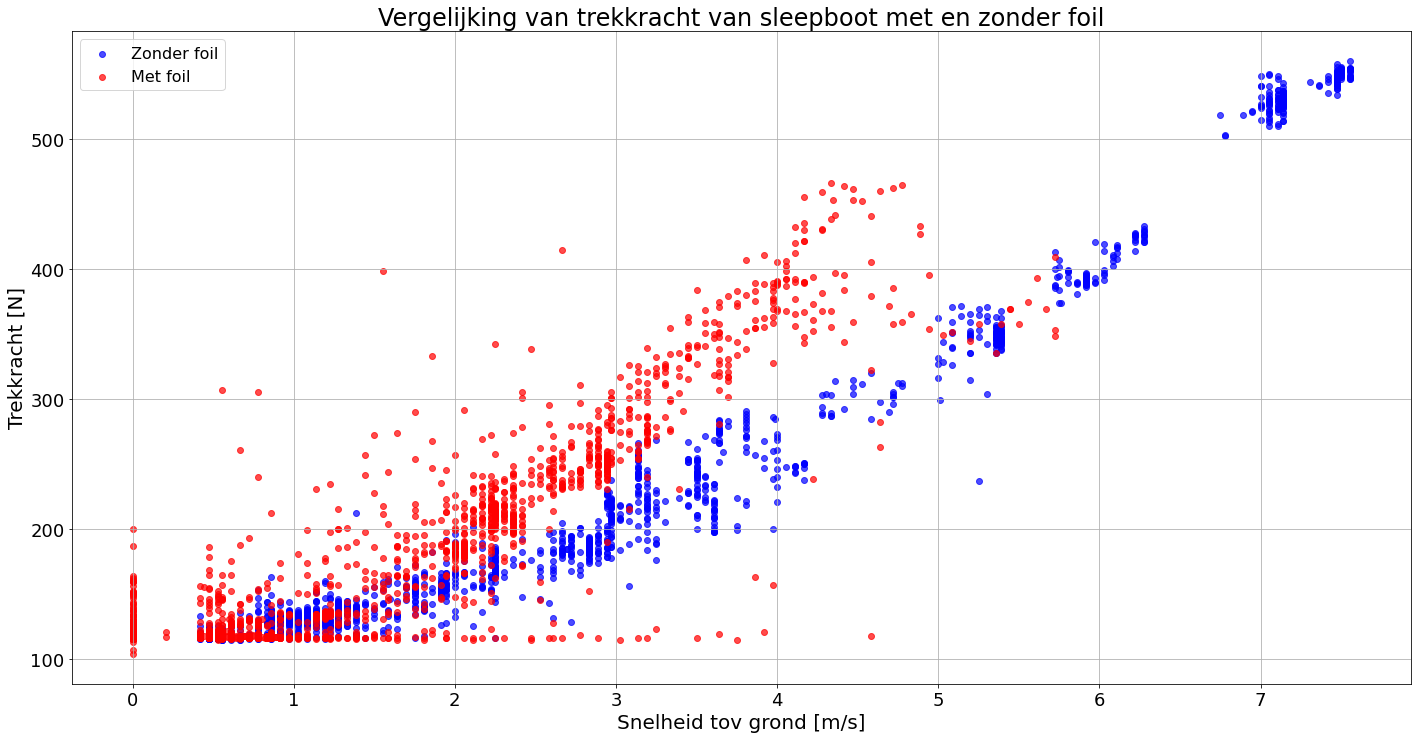

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Sleepboot zonder foil (merged_df1)
x1 = merged_df1["speed_grond_ms"].to_numpy()  # Snelheid in m/s
y1 = merged_df1['2_Loadcell in N'].to_numpy()

# Sleepboot met foil (merged_df4)
x2 = merged_df4["speed_grond_ms"].to_numpy()  # Snelheid in m/s
y2 = merged_df4['2_Loadcell in N'].to_numpy()

# Plot beide datasets in één figuur met vaste kleuren
plt.figure(figsize=(24, 12))

# Plot zonder foil met een vaste kleur
plt.scatter(x1, y1, color='blue', label='Zonder foil', alpha=0.7)

# Plot met foil met een vaste kleur
plt.scatter(x2, y2, color='red', label='Met foil', alpha=0.7)

# Assen en titel
plt.xlabel('Snelheid tov grond [m/s]', fontsize=20)
plt.ylabel('Trekkracht [N]', fontsize=20)
plt.title('Vergelijking van trekkracht van sleepboot met en zonder foil', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()


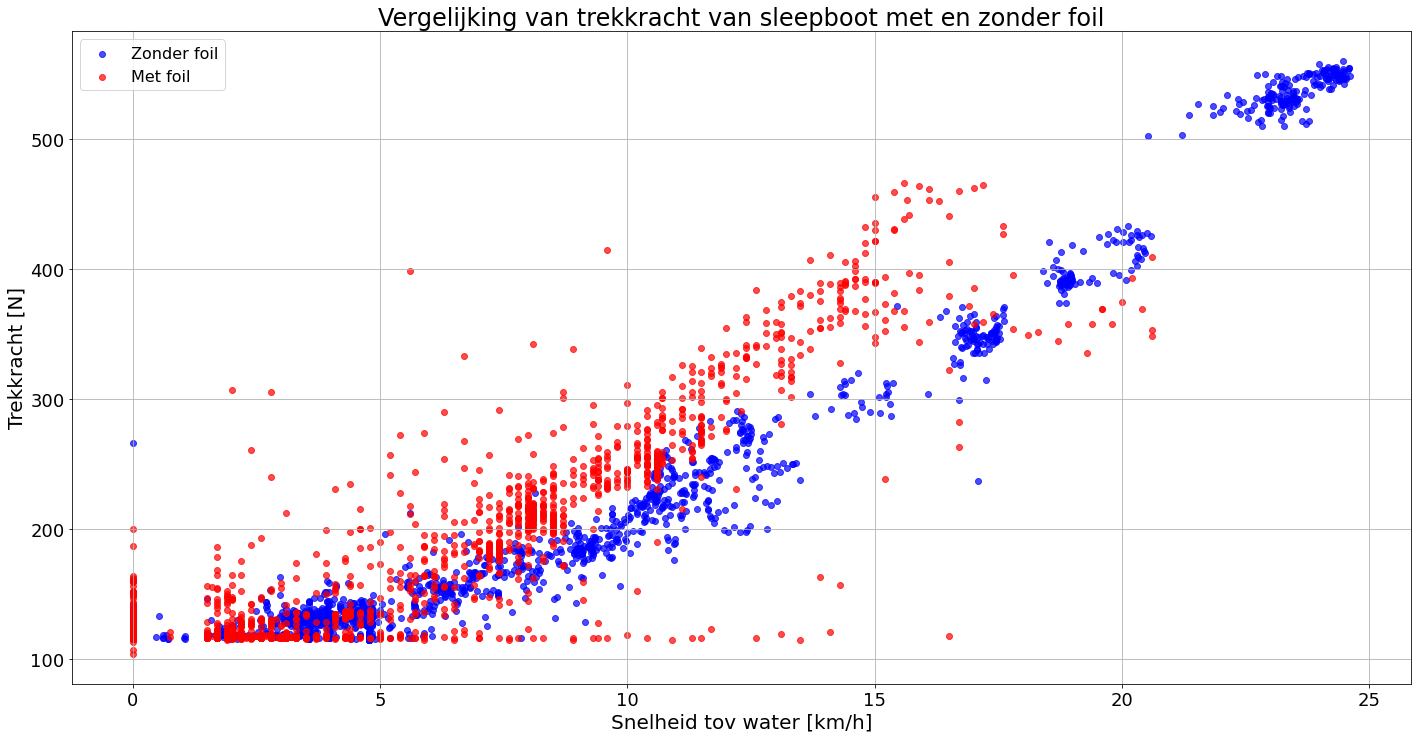

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Sleepboot zonder foil (merged_df1)
x1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()  # Snelheid in km/h
y1 = merged_df1['2_Loadcell in N'].to_numpy()

# Sleepboot met foil (merged_df4)
x2 = merged_df4['1_Snelheid over de grond in km/h'].to_numpy()  # Snelheid in km/h
y2 = merged_df4['2_Loadcell in N'].to_numpy()

# Plot beide datasets in één figuur met vaste kleuren
plt.figure(figsize=(24, 12))

# Plot zonder foil met een vaste kleur
plt.scatter(x1, y1, color='blue', label='Zonder foil', alpha=0.7)

# Plot met foil met een vaste kleur
plt.scatter(x2, y2, color='red', label='Met foil', alpha=0.7)

# Assen en titel
plt.xlabel('Snelheid tov water [km/h]', fontsize=20)
plt.ylabel('Trekkracht [N]', fontsize=20)
plt.title('Vergelijking van trekkracht van sleepboot met en zonder foil', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()


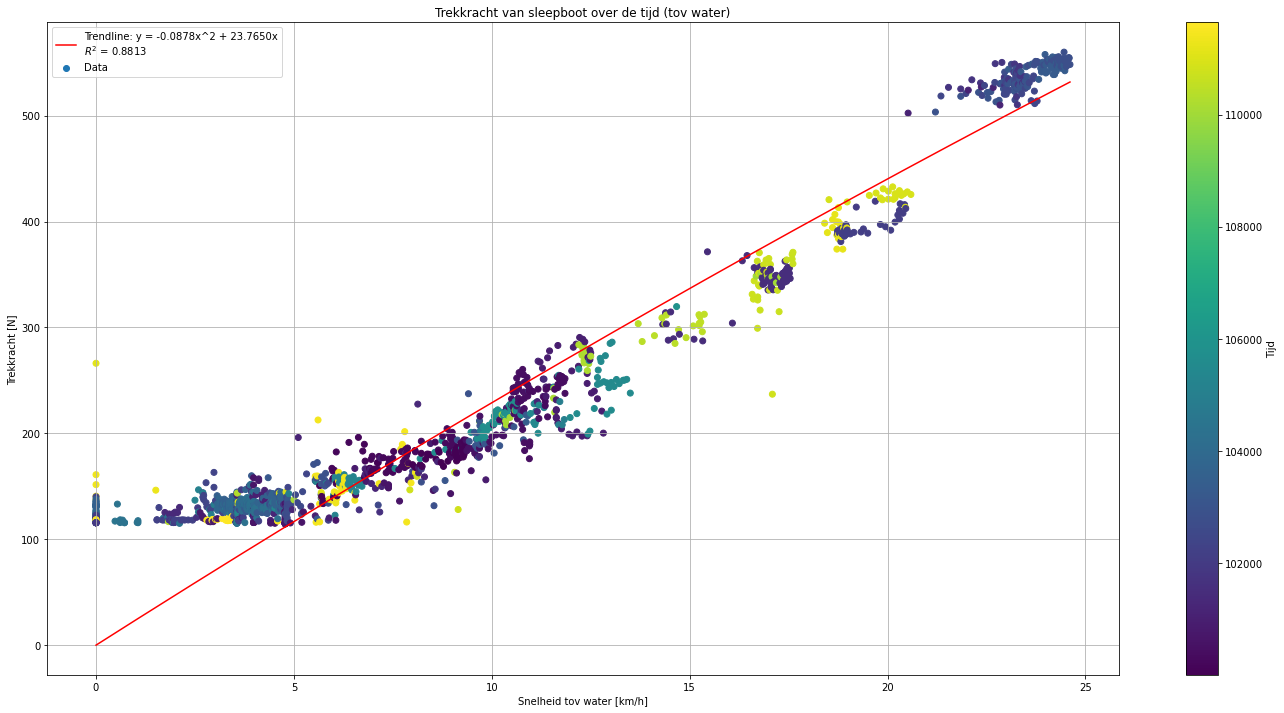

In [131]:
# Tweede plot: Snelheid ten opzichte van het water
sorted_indices2 = np.argsort(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy())
x2 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()[sorted_indices2]
y2 = merged_df1['2_Loadcell in N'].to_numpy()[sorted_indices2]

# Kwadratische fit door de oorsprong (y = ax + bx^2, zonder intercept)
A2 = np.vstack([x2**2, x2]).T
coeffs2, _, _, _ = np.linalg.lstsq(A2, y2, rcond=None)
a2, b2 = coeffs2
trendline2 = a2 * x2**2 + b2 * x2

# Bereken R^2 voor de tweede plot
ss_res2 = np.sum((y2 - trendline2) ** 2)
ss_tot2 = np.sum((y2 - np.mean(y2)) ** 2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

plt.figure(figsize=(24, 12))
plt.scatter(x2, y2, c=merged_df1['1_Tijd'].to_numpy()[sorted_indices2], label='Data')
plt.plot(x2, trendline2, color='red', label=f'Trendline: y = {a2:.4f}x^2 + {b2:.4f}x\n$R^2$ = {r_squared2:.4f}')
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd (tov water)')
plt.legend()
plt.grid(True)
plt.show()

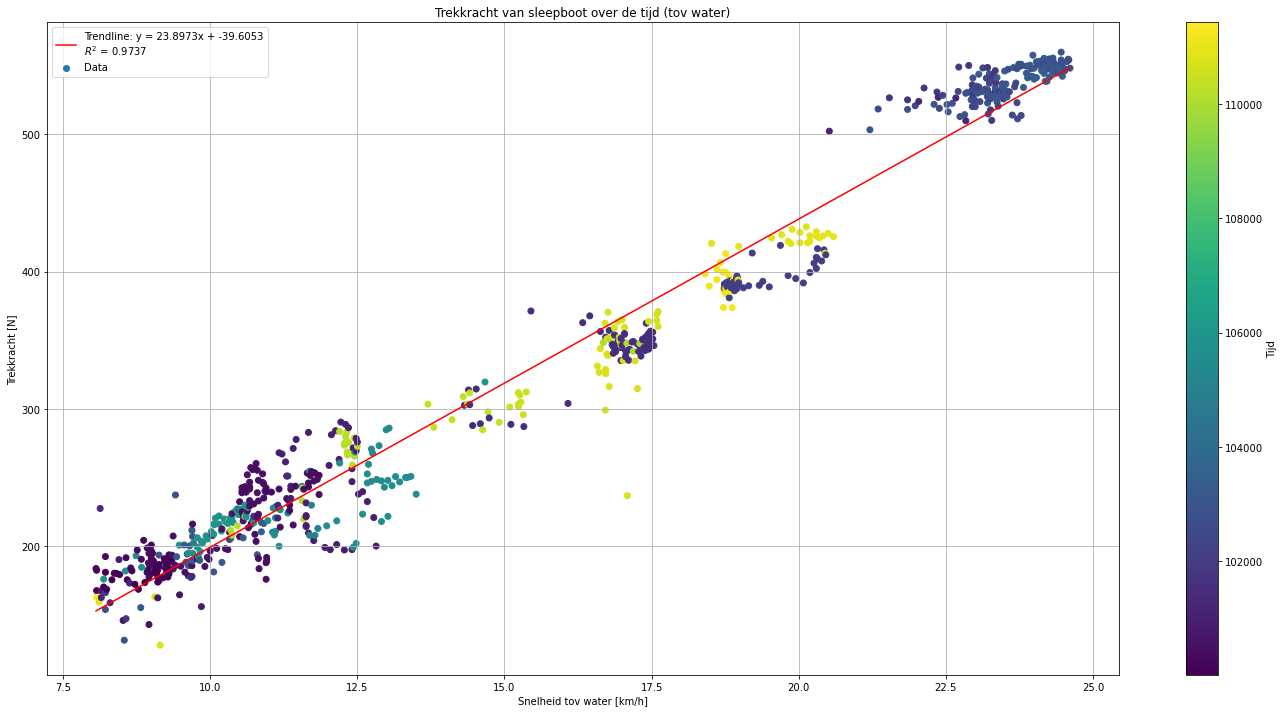

In [141]:
#fitler de snleheid lager dan 5 km/u tov van het water eruit
merged_df1_linear = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 8].copy()
merged_df1_linear = merged_df1_linear[merged_df1_linear['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 30]

# Sorteer de data voor een lineaire fit
sorted_indices2 = np.argsort(merged_df1_linear['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy())
x2 = merged_df1_linear['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()[sorted_indices2]
y2 = merged_df1_linear['2_Loadcell in N'].to_numpy()[sorted_indices2]

# Lineaire fit met intercept (y = ax + b)
A2 = np.vstack([x2, np.ones(len(x2))]).T
coeffs2, _, _, _ = np.linalg.lstsq(A2, y2, rcond=None)
a2, b2 = coeffs2
trendline2 = a2 * x2 + b2

# Bereken R^2 voor de lineaire fit
ss_res2 = np.sum((y2 - trendline2) ** 2)
ss_tot2 = np.sum((y2 - np.mean(y2)) ** 2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Plot met lineaire fit
plt.figure(figsize=(24, 12))
plt.scatter(x2, y2, c=merged_df1_linear['1_Tijd'].to_numpy()[sorted_indices2], label='Data')
plt.plot(x2, trendline2, color='red', label=f'Trendline: y = {a2:.4f}x + {b2:.4f}\n$R^2$ = {r_squared2:.4f}')
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd (tov water)')
plt.legend()
plt.grid(True)
plt.show()


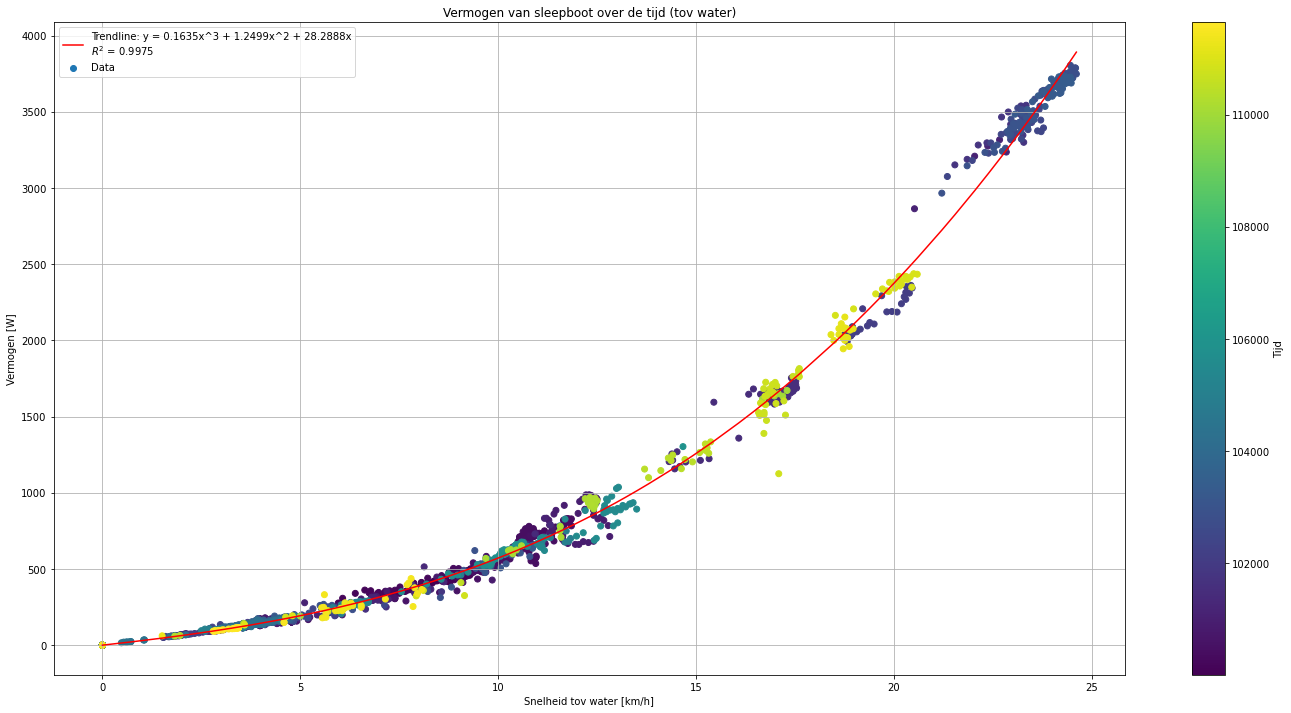

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Data voor de fitting
x = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y = merged_df1['Vermogen aantrekking'].to_numpy()

# Sorteer de data op snelheid voor een mooiere trendlijn
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Pas een derdegraads polynoom aan door de oorsprong (y = ax^3 + bx^2 + cx)
A = np.vstack([x_sorted**3, x_sorted**2, x_sorted]).T
coeffs, _, _, _ = np.linalg.lstsq(A, y_sorted, rcond=None)
a, b, c = coeffs  # Coëfficiënten van het derdegraads polynoom

# Bereken de trendlijn
trendline = a * x_sorted**3 + b * x_sorted**2 + c * x_sorted

# Bereken R^2
ss_res = np.sum((y_sorted - trendline) ** 2)
ss_tot = np.sum((y_sorted - np.mean(y_sorted)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Plotten van snelheid ten opzichte van vermogen met trendlijn en R^2
plt.figure(figsize=(24, 12))
plt.scatter(x, y, c=merged_df1['1_Tijd'].to_numpy(), label='Data')
plt.plot(x_sorted, trendline, color='red', label=f'Trendline: y = {a:.4f}x^3 + {b:.4f}x^2 + {c:.4f}x\n$R^2$ = {r_squared:.4f}')
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vermogen van sleepboot over de tijd (tov water)')
plt.grid(True)
plt.legend()
plt.show()


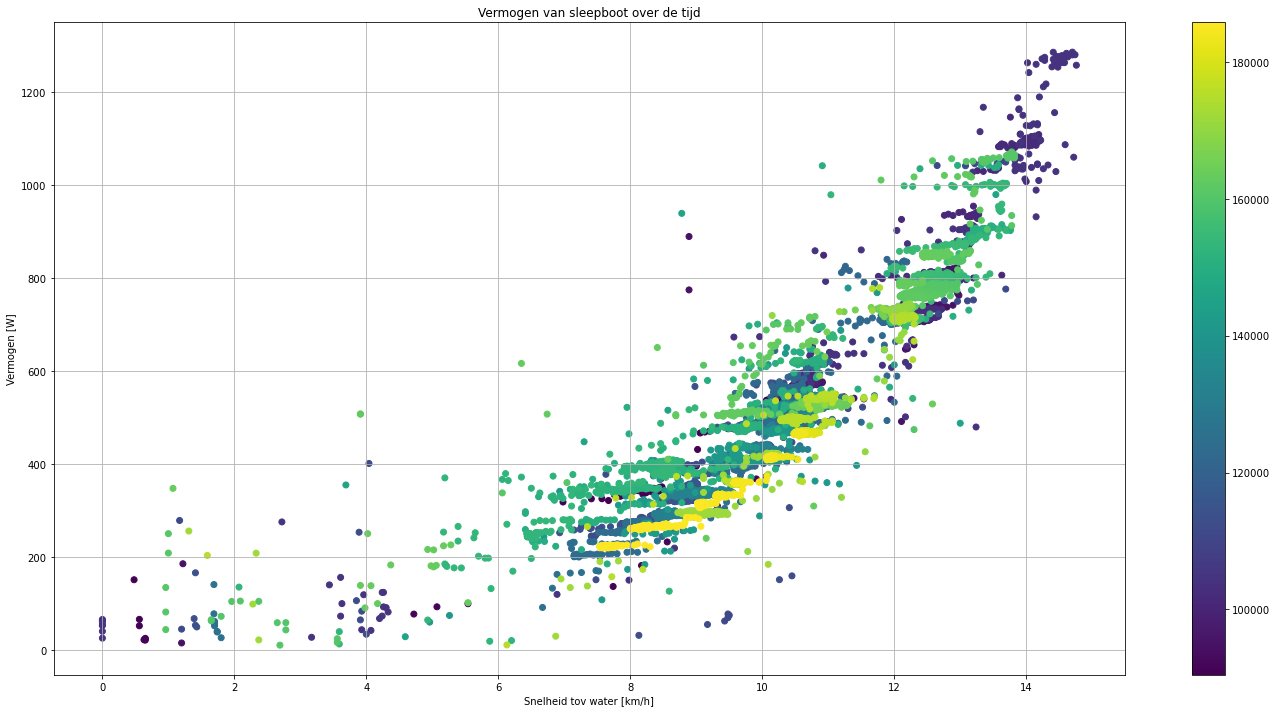

In [134]:
#plot van merged3 de vesc vermogen tov van de snelheid
plt.figure(figsize=(24, 12))
plt.scatter(merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df3['2_VESC input vermogen (W)'].to_numpy(),c=merged_df3['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vermogen van sleepboot over de tijd')
plt.grid(True)
plt.show()

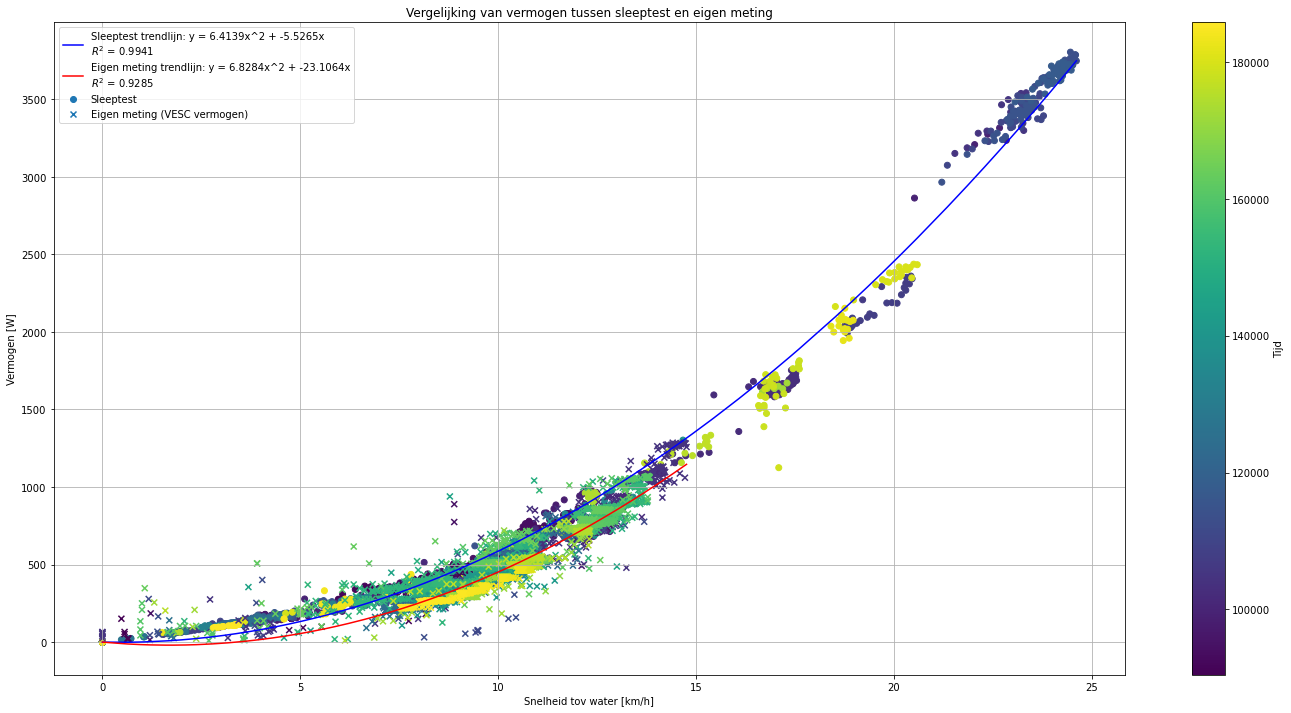

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid omzetten van km/h naar m/s
merged_df1["speed_water_ms"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() * 0.27778
merged_df1['Vermogen aantrekking'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_ms"]

# Data voor de sleeptest (vermogen vs snelheid)
x1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y1 = merged_df1['Vermogen aantrekking'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices1 = np.argsort(x1)
x1_sorted = x1[sorted_indices1]
y1_sorted = y1[sorted_indices1]

# Pas een tweedegraads polynoom aan door de oorsprong voor de sleeptest
A1 = np.vstack([x1_sorted**2, x1_sorted]).T
coeffs1, _, _, _ = np.linalg.lstsq(A1, y1_sorted, rcond=None)
a1, b1 = coeffs1
trendline1 = a1 * x1_sorted**2 + b1 * x1_sorted

# Bereken R^2 voor de sleeptest
ss_res1 = np.sum((y1_sorted - trendline1) ** 2)
ss_tot1 = np.sum((y1_sorted - np.mean(y1_sorted)) ** 2)
r_squared1 = 1 - (ss_res1 / ss_tot1)

# Data voor de eigen meting (merged_df3)
x2 = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y2 = merged_df3['2_VESC input vermogen (W)'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de eigen meting
sorted_indices2 = np.argsort(x2)
x2_sorted = x2[sorted_indices2]
y2_sorted = y2[sorted_indices2]

# Pas een tweedegraads polynoom aan door de oorsprong voor de eigen meting
A2 = np.vstack([x2_sorted**2, x2_sorted]).T
coeffs2, _, _, _ = np.linalg.lstsq(A2, y2_sorted, rcond=None)
a2, b2 = coeffs2
trendline2 = a2 * x2_sorted**2 + b2 * x2_sorted

# Bereken R^2 voor de eigen meting
ss_res2 = np.sum((y2_sorted - trendline2) ** 2)
ss_tot2 = np.sum((y2_sorted - np.mean(y2_sorted)) ** 2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Plot beide datasets met trendlijnen
plt.figure(figsize=(24, 12))

# Plot voor de sleeptest
plt.scatter(x1, y1, c=merged_df1['1_Tijd'].to_numpy(), label='Sleeptest')
plt.plot(x1_sorted, trendline1, color='blue', label=f'Sleeptest trendlijn: y = {a1:.4f}x^2 + {b1:.4f}x\n$R^2$ = {r_squared1:.4f}')

# Plot voor de eigen meting van de boot
plt.scatter(x2, y2, c=merged_df3['1_Tijd'].to_numpy(), marker='x', label='Eigen meting (VESC vermogen)')
plt.plot(x2_sorted, trendline2, color='red', label=f'Eigen meting trendlijn: y = {a2:.4f}x^2 + {b2:.4f}x\n$R^2$ = {r_squared2:.4f}')

# Afwerking van de plot
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vergelijking van vermogen tussen sleeptest en eigen meting')
plt.legend()
plt.grid(True)
plt.show()

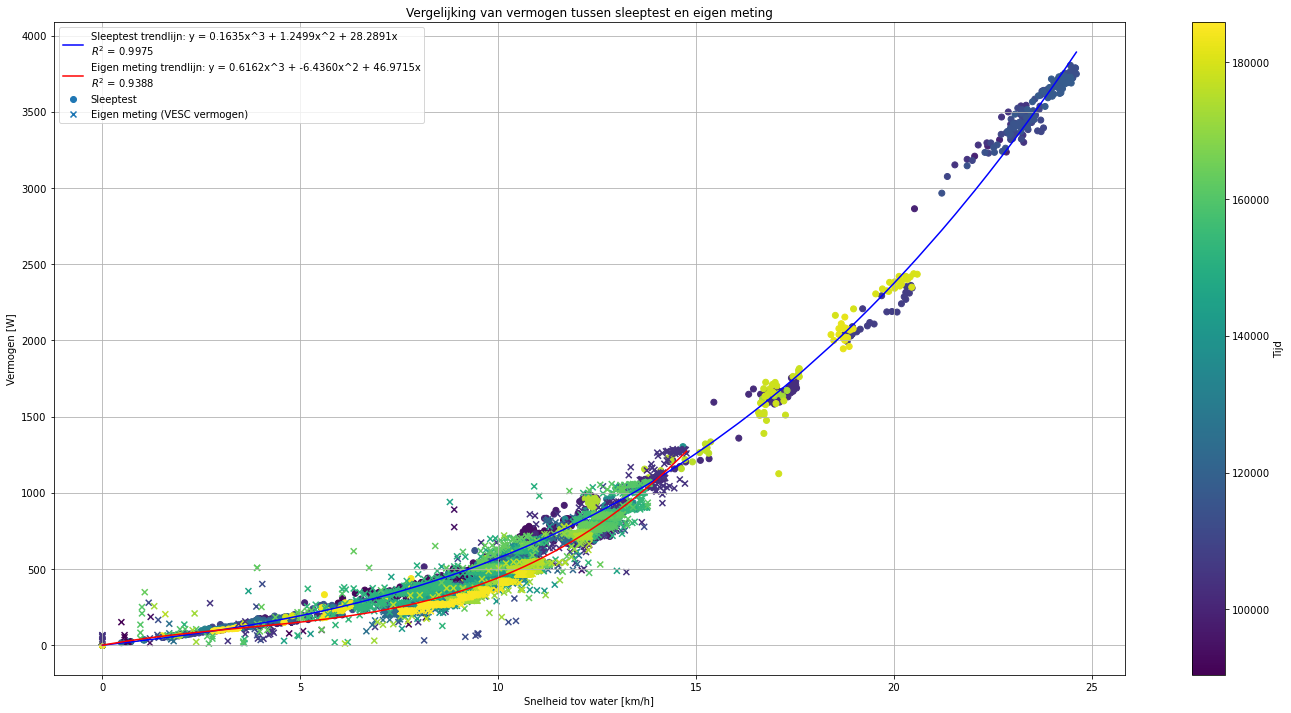

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid omzetten van km/h naar m/s
merged_df1["speed_water_ms"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() * 0.27778
merged_df1['Vermogen aantrekking'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_ms"]

# Data voor de sleeptest (vermogen vs snelheid)
x1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y1 = merged_df1['Vermogen aantrekking'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices1 = np.argsort(x1)
x1_sorted = x1[sorted_indices1]
y1_sorted = y1[sorted_indices1]

# Pas een derdegraads polynoom aan voor de sleeptest
A1 = np.vstack([x1_sorted**3, x1_sorted**2, x1_sorted]).T
coeffs1, _, _, _ = np.linalg.lstsq(A1, y1_sorted, rcond=None)
a1, b1, c1 = coeffs1
trendline1 = a1 * x1_sorted**3 + b1 * x1_sorted**2 + c1 * x1_sorted

# Bereken R^2 voor de sleeptest
ss_res1 = np.sum((y1_sorted - trendline1) ** 2)
ss_tot1 = np.sum((y1_sorted - np.mean(y1_sorted)) ** 2)
r_squared1 = 1 - (ss_res1 / ss_tot1)

# Data voor de eigen meting (merged_df3)
x2 = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
y2 = merged_df3['2_VESC input vermogen (W)'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de eigen meting
sorted_indices2 = np.argsort(x2)
x2_sorted = x2[sorted_indices2]
y2_sorted = y2[sorted_indices2]

# Pas een derdegraads polynoom aan voor de eigen meting
A2 = np.vstack([x2_sorted**3, x2_sorted**2, x2_sorted]).T
coeffs2, _, _, _ = np.linalg.lstsq(A2, y2_sorted, rcond=None)
a2, b2, c2 = coeffs2
trendline2 = a2 * x2_sorted**3 + b2 * x2_sorted**2 + c2 * x2_sorted

# Bereken R^2 voor de eigen meting
ss_res2 = np.sum((y2_sorted - trendline2) ** 2)
ss_tot2 = np.sum((y2_sorted - np.mean(y2_sorted)) ** 2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

# Plot beide datasets met trendlijnen
plt.figure(figsize=(24, 12))

# Plot voor de sleeptest
plt.scatter(x1, y1, c=merged_df1['1_Tijd'].to_numpy(), label='Sleeptest')
plt.plot(x1_sorted, trendline1, color='blue', label=f'Sleeptest trendlijn: y = {a1:.4f}x^3 + {b1:.4f}x^2 + {c1:.4f}x\n$R^2$ = {r_squared1:.4f}')

# Plot voor de eigen meting van de boot
plt.scatter(x2, y2, c=merged_df3['1_Tijd'].to_numpy(), marker='x', label='Eigen meting (VESC vermogen)')
plt.plot(x2_sorted, trendline2, color='red', label=f'Eigen meting trendlijn: y = {a2:.4f}x^3 + {b2:.4f}x^2 + {c2:.4f}x\n$R^2$ = {r_squared2:.4f}')

# Afwerking van de plot
plt.colorbar(label='Tijd')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vergelijking van vermogen tussen sleeptest en eigen meting')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-137-78773223838b>:14: RuntimeWarning: invalid value encountered in divide
  rendement_ratio_extrapolated = (trendline1_extrapolated / trendline2_extrapolated) * 100


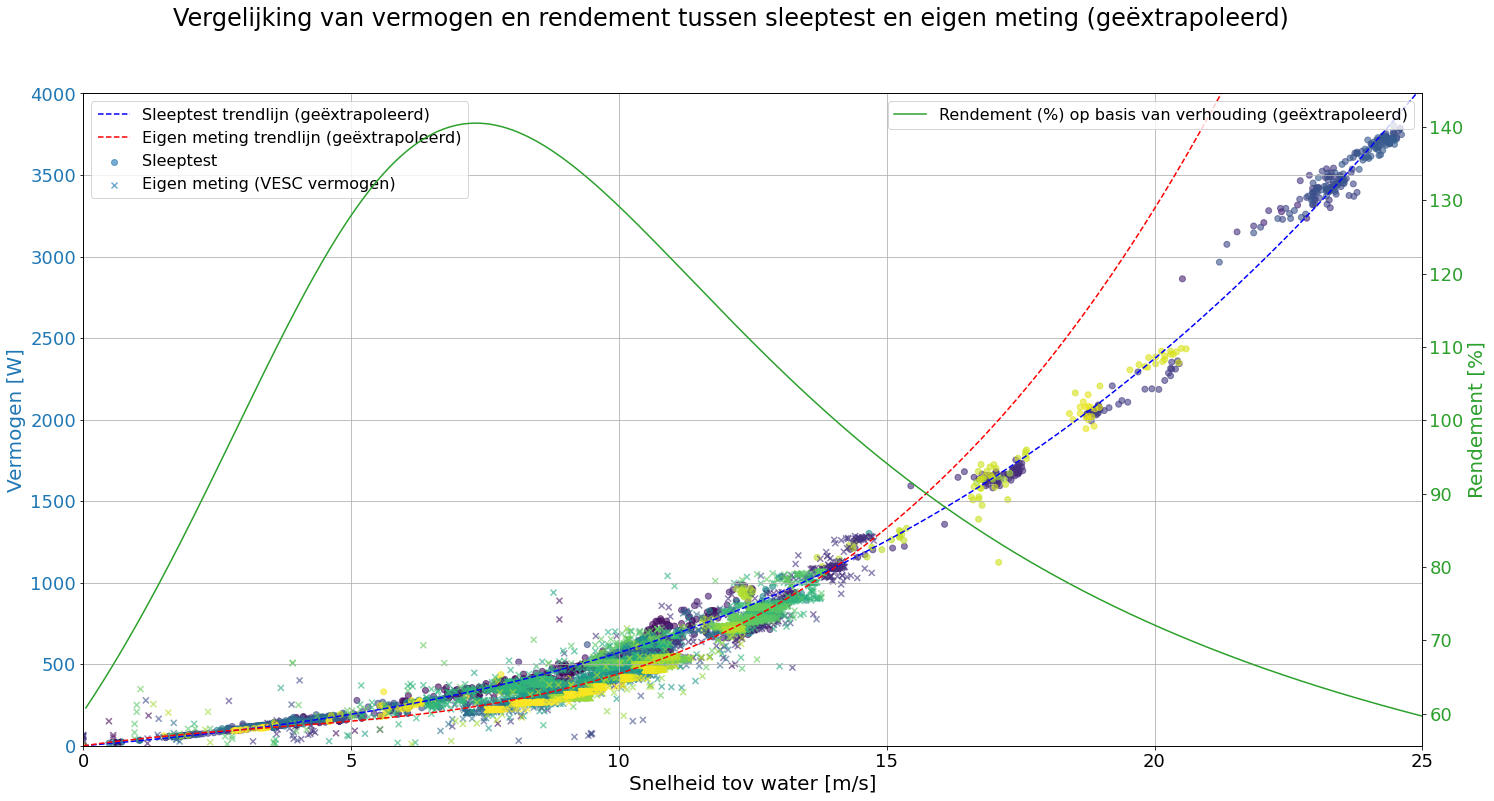

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Extrapolatie van de trendlijn voor snelheden tot bijvoorbeeld 10 m/s
max_speed = 25
x_extrapolated = np.linspace(0, max_speed, 500)  # 500 punten tussen 0 en max_speed

# Gebruik de coëfficiënten voor de derdegraads polynoom trendlijn voor extrapolatie
trendline1_extrapolated = a1 * x_extrapolated**3 + b1 * x_extrapolated**2 + c1 * x_extrapolated
trendline2_extrapolated = a2 * x_extrapolated**3 + b2 * x_extrapolated**2 + c2 * x_extrapolated

# Bereken rendement op basis van de geëxtrapoleerde trendlijnen
rendement_ratio_extrapolated = (trendline1_extrapolated / trendline2_extrapolated) * 100

# Plot beide datasets met de geëxtrapoleerde trendlijnen en het rendement op tweede y-as
fig, ax1 = plt.subplots(figsize=(24, 12))

# Eerste y-as: Vermogen plotten met geëxtrapoleerde trendlijnen
color = 'tab:blue'
ax1.set_xlabel('Snelheid tov water [m/s]', fontsize=20)
ax1.set_ylabel('Vermogen [W]', color=color, fontsize=20)
ax1.scatter(x1, y1, c=merged_df1['1_Tijd'].to_numpy(), label='Sleeptest', alpha=0.6)
ax1.plot(x_extrapolated, trendline1_extrapolated, color='blue', linestyle='--', label='Sleeptest trendlijn (geëxtrapoleerd)')
ax1.scatter(x2, y2, c=merged_df3['1_Tijd'].to_numpy(), marker='x', label='Eigen meting (VESC vermogen)', alpha=0.6)
ax1.plot(x_extrapolated, trendline2_extrapolated, color='red', linestyle='--', label='Eigen meting trendlijn (geëxtrapoleerd)')
ax1.set_ylim(0, 4000)  # Schaal de linker y-as tot 4 kW
ax1.set_xlim(0, max_speed)  # Schaal de x-as tot max_speed (10 m/s hier)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.legend(loc="upper left", fontsize=16)
ax1.grid(True)

# Tweede y-as: Rendement plotten als (sleeptest / eigen meting) * 100%
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Rendement [%]', color=color, fontsize=20)
ax2.plot(x_extrapolated, rendement_ratio_extrapolated, color=color, label='Rendement (%) op basis van verhouding (geëxtrapoleerd)')
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)
ax2.legend(loc="upper right", fontsize=16)

# Witte achtergrond
fig.patch.set_facecolor('white')
fig.suptitle('Vergelijking van vermogen en rendement tussen sleeptest en eigen meting (geëxtrapoleerd)', fontsize=24)
plt.show()


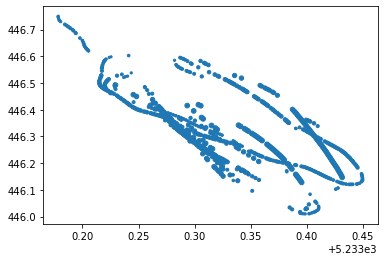

In [29]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [6]:
#filter snelheid onder de 0 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]

#snelheid boven de 30 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#filter eruit alles acceleraties met .diff() die groter zijn dan 0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]

#acceleraties boven de -0.1 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

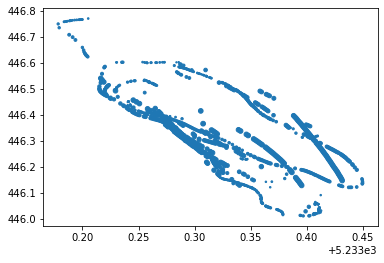

In [8]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [8]:
#data["8_VESC input vermogen (W)"] = data['8_VESC input current (A)']*data['8_VESC input voltage (V)']
#data["7_Acceleratie boot tov grond"] = data["7_Snelheid over de grond in km/h"].diff()
#data["7_Acceleratie boot tov water"] = data["7_Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [44]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [45]:
def bereken_snelheden(df, kolom_wattage,begin_snelheid = 0.01, massa=500, eta=0.7, rho_water=1000, Cd_water=0.3, A_water=0.6, rho_lucht=1.225, Cd_lucht=0.1, A_lucht=0.8, dt=1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'theoretische snelheid met weerstand' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = begin_snelheid  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.iloc[i][kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['theoretische snelheid met weerstand'] = snelheden
    return df

In [46]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')
data_new["Verschil snelheid grond en theoretisch"]= data_new["Snelheid over de grond in km/h"]-data_new['theoretische snelheid met weerstand']*3.6
data_new["Verschil snelheid water en theoretisch"]= data_new["Snelheid tenopzichte van het water in Kilometers per uur"]-data_new['theoretische snelheid met weerstand']*3.6

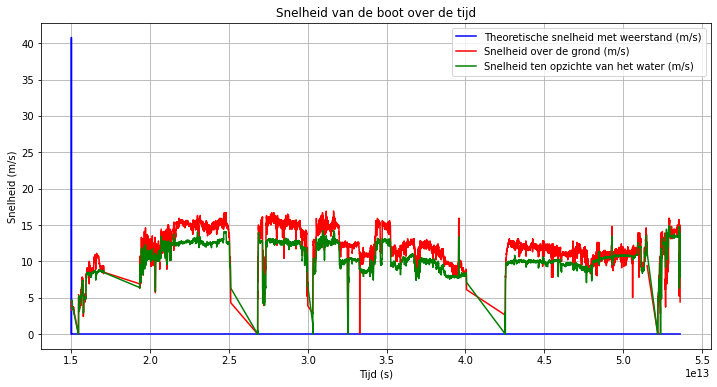

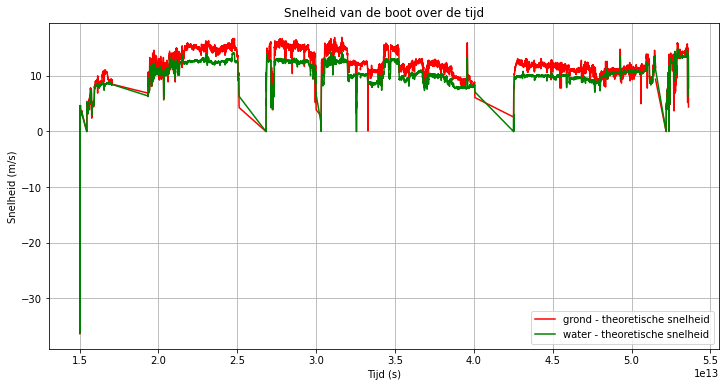

In [48]:
plt.figure(figsize=(12, 6))

# Plot de theoretische snelheid met weerstand
plt.plot(data_new.index, data_new['theoretische snelheid met weerstand']*3.6, label='Theoretische snelheid met weerstand (m/s)', color='b')

# Plot de snelheid over de grond
plt.plot(data_new.index, data_new['Snelheid over de grond in km/h'], label='Snelheid over de grond (m/s)', color='r')

# Plot de snelheid ten opzichte van het water
plt.plot(data_new.index, data_new['Snelheid tenopzichte van het water in Kilometers per uur'], label='Snelheid ten opzichte van het water (m/s)', color='g')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data_new.index, data_new["Verschil snelheid grond en theoretisch"], label='grond - theoretische snelheid', color='r')
plt.plot(data_new.index,data_new['Verschil snelheid water en theoretisch'] , label='water - theoretische snelheid', color='g')
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()

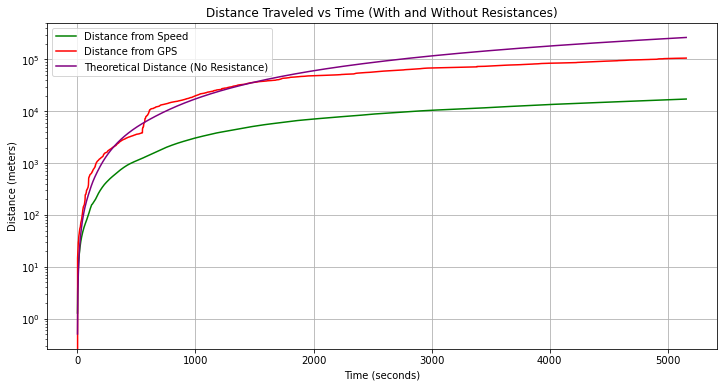

In [114]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()